Shortest tour: (0, 1, 2, 3, 4)
Shortest length: 5


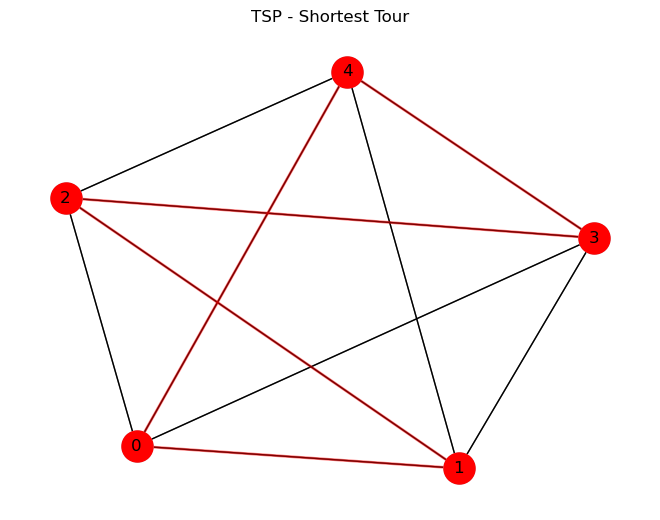

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations

def generate_complete_graph(num_nodes):
    G = nx.complete_graph(num_nodes)
    for (u, v, w) in G.edges(data=True):
        w['weight'] = 1  # Assigning equal weights for simplicity
    return G

def calculate_tour_length(graph, tour):
    length = 0
    for i in range(len(tour) - 1):
        length += graph[tour[i]][tour[i+1]]['weight']
    length += graph[tour[-1]][tour[0]]['weight']  # Return to starting node
    return length

def brute_force_tsp(graph):
    shortest_tour = None
    shortest_length = float('inf')

    for perm in permutations(graph.nodes()):
        tour_length = calculate_tour_length(graph, perm)
        if tour_length < shortest_length:
            shortest_length = tour_length
            shortest_tour = perm

    return shortest_tour, shortest_length

# Example usage:
num_nodes = 5
graph = generate_complete_graph(num_nodes)
shortest_tour, shortest_length = brute_force_tsp(graph)
print("Shortest tour:", shortest_tour)
print("Shortest length:", shortest_length)

# Visualization
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(graph, pos, width=1.0, alpha=0.5)
nx.draw_networkx_nodes(graph, pos, nodelist=shortest_tour, node_color='red', node_size=500)
nx.draw_networkx_edges(graph, pos, edgelist=list(zip(shortest_tour, shortest_tour[1:])) + [(shortest_tour[-1], shortest_tour[0])], width=2.0, alpha=0.5, edge_color='r')
plt.title("TSP - Shortest Tour")
plt.show()
